In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys 
import requests
import datetime as dt

In [2]:
key = 'private key' #see Tomorrow.io to obtain a private key

In [3]:
#curl --request GET --url \
url = 'https://api.tomorrow.io/v4/timelines'

In [4]:
querystring = {
"location":"64.8, 147.7",
"fields":["precipitationIntensity", "precipitationType", "temperature", "cloudCover"],
"units":"imperial",
"timesteps":"1d",
"apikey":key}

In [5]:
response = requests.request("GET", url, params=querystring)

In [6]:
response.text

'{"data":{"timelines":[{"timestep":"1d","startTime":"2021-09-29T19:00:00Z","endTime":"2021-10-13T19:00:00Z","intervals":[{"startTime":"2021-09-29T19:00:00Z","values":{"precipitationIntensity":0.001,"precipitationType":2,"temperature":27.61,"cloudCover":100}},{"startTime":"2021-09-30T19:00:00Z","values":{"precipitationIntensity":0.0111,"precipitationType":2,"temperature":26.33,"cloudCover":100}},{"startTime":"2021-10-01T19:00:00Z","values":{"precipitationIntensity":0.0004,"precipitationType":2,"temperature":36.1,"cloudCover":100}},{"startTime":"2021-10-02T19:00:00Z","values":{"precipitationIntensity":0.001,"precipitationType":2,"temperature":27.88,"cloudCover":96.92}},{"startTime":"2021-10-03T19:00:00Z","values":{"precipitationIntensity":0.001,"precipitationType":2,"temperature":22.8,"cloudCover":99.17}},{"startTime":"2021-10-04T19:00:00Z","values":{"precipitationIntensity":0.0006,"precipitationType":2,"temperature":19.85,"cloudCover":95.78}},{"startTime":"2021-10-05T19:00:00Z","values"

In [7]:
type(response.text)

str

In [8]:
response_json = response.json()

In [9]:
#observe the dictionary
response_json

{'data': {'timelines': [{'timestep': '1d',
    'startTime': '2021-09-29T19:00:00Z',
    'endTime': '2021-10-13T19:00:00Z',
    'intervals': [{'startTime': '2021-09-29T19:00:00Z',
      'values': {'precipitationIntensity': 0.001,
       'precipitationType': 2,
       'temperature': 27.61,
       'cloudCover': 100}},
     {'startTime': '2021-09-30T19:00:00Z',
      'values': {'precipitationIntensity': 0.0111,
       'precipitationType': 2,
       'temperature': 26.33,
       'cloudCover': 100}},
     {'startTime': '2021-10-01T19:00:00Z',
      'values': {'precipitationIntensity': 0.0004,
       'precipitationType': 2,
       'temperature': 36.1,
       'cloudCover': 100}},
     {'startTime': '2021-10-02T19:00:00Z',
      'values': {'precipitationIntensity': 0.001,
       'precipitationType': 2,
       'temperature': 27.88,
       'cloudCover': 96.92}},
     {'startTime': '2021-10-03T19:00:00Z',
      'values': {'precipitationIntensity': 0.001,
       'precipitationType': 2,
       'tempe

In [10]:
response_json.keys()

dict_keys(['data'])

In [11]:
response_json['data'].keys()

dict_keys(['timelines'])

In [12]:
#obtain observations for a slice of the data
response_json['data']['timelines'][0]['intervals'][1]['values']

{'precipitationIntensity': 0.0111,
 'precipitationType': 2,
 'temperature': 26.33,
 'cloudCover': 100}

In [13]:
#length of observations
length = len(response_json['data']['timelines'][0]['intervals'])
length

15

In [14]:
for r in range(length):
    print(response_json['data']['timelines'][0]['intervals'][r])

{'startTime': '2021-09-29T19:00:00Z', 'values': {'precipitationIntensity': 0.001, 'precipitationType': 2, 'temperature': 27.61, 'cloudCover': 100}}
{'startTime': '2021-09-30T19:00:00Z', 'values': {'precipitationIntensity': 0.0111, 'precipitationType': 2, 'temperature': 26.33, 'cloudCover': 100}}
{'startTime': '2021-10-01T19:00:00Z', 'values': {'precipitationIntensity': 0.0004, 'precipitationType': 2, 'temperature': 36.1, 'cloudCover': 100}}
{'startTime': '2021-10-02T19:00:00Z', 'values': {'precipitationIntensity': 0.001, 'precipitationType': 2, 'temperature': 27.88, 'cloudCover': 96.92}}
{'startTime': '2021-10-03T19:00:00Z', 'values': {'precipitationIntensity': 0.001, 'precipitationType': 2, 'temperature': 22.8, 'cloudCover': 99.17}}
{'startTime': '2021-10-04T19:00:00Z', 'values': {'precipitationIntensity': 0.0006, 'precipitationType': 2, 'temperature': 19.85, 'cloudCover': 95.78}}
{'startTime': '2021-10-05T19:00:00Z', 'values': {'precipitationIntensity': 0, 'precipitationType': 0, 'te

In [15]:
#first recorded temperature
temp = response_json['data']['timelines'][0]['intervals'][0]['values']['temperature']
temp

27.61

In [16]:
forecasts = response_json['data']['timelines'][0]['intervals']
forecasts

[{'startTime': '2021-09-29T19:00:00Z',
  'values': {'precipitationIntensity': 0.001,
   'precipitationType': 2,
   'temperature': 27.61,
   'cloudCover': 100}},
 {'startTime': '2021-09-30T19:00:00Z',
  'values': {'precipitationIntensity': 0.0111,
   'precipitationType': 2,
   'temperature': 26.33,
   'cloudCover': 100}},
 {'startTime': '2021-10-01T19:00:00Z',
  'values': {'precipitationIntensity': 0.0004,
   'precipitationType': 2,
   'temperature': 36.1,
   'cloudCover': 100}},
 {'startTime': '2021-10-02T19:00:00Z',
  'values': {'precipitationIntensity': 0.001,
   'precipitationType': 2,
   'temperature': 27.88,
   'cloudCover': 96.92}},
 {'startTime': '2021-10-03T19:00:00Z',
  'values': {'precipitationIntensity': 0.001,
   'precipitationType': 2,
   'temperature': 22.8,
   'cloudCover': 99.17}},
 {'startTime': '2021-10-04T19:00:00Z',
  'values': {'precipitationIntensity': 0.0006,
   'precipitationType': 2,
   'temperature': 19.85,
   'cloudCover': 95.78}},
 {'startTime': '2021-10-05T

In [17]:
weather_dict = {}
dates, temps, cloud_coverage, precipitation_intensity, precipitation_type = [], [], [], [], []

for daily_forecast in forecasts:
    date = daily_forecast['startTime'][0:15]
    temp = daily_forecast['values']['temperature']
    cloudy = daily_forecast['values']['cloudCover']
    precip_int = daily_forecast['values']['precipitationIntensity']
    precip_type = daily_forecast['values']['precipitationType']
    print(f'On {date},the temperature will be {temp},with {cloudy}% cloud coverage and {(precip_int):.3f} in/h precipitation.')
    
    dates.append(date)
    temps.append(temp)
    cloud_coverage.append(cloudy)
    precipitation_intensity.append(precip_int)
    precipitation_type.append(precip_type)

On 2021-09-29T19:0,the temperature will be 27.61,with 100% cloud coverage and 0.001 in/h precipitation.
On 2021-09-30T19:0,the temperature will be 26.33,with 100% cloud coverage and 0.011 in/h precipitation.
On 2021-10-01T19:0,the temperature will be 36.1,with 100% cloud coverage and 0.000 in/h precipitation.
On 2021-10-02T19:0,the temperature will be 27.88,with 96.92% cloud coverage and 0.001 in/h precipitation.
On 2021-10-03T19:0,the temperature will be 22.8,with 99.17% cloud coverage and 0.001 in/h precipitation.
On 2021-10-04T19:0,the temperature will be 19.85,with 95.78% cloud coverage and 0.001 in/h precipitation.
On 2021-10-05T19:0,the temperature will be 17.73,with 61.49% cloud coverage and 0.000 in/h precipitation.
On 2021-10-06T19:0,the temperature will be 17.13,with 22.87% cloud coverage and 0.000 in/h precipitation.
On 2021-10-07T19:0,the temperature will be 17.08,with 83.54% cloud coverage and 0.000 in/h precipitation.
On 2021-10-08T19:0,the temperature will be 18.55,with 

In [18]:
dates

['2021-09-29T19:0',
 '2021-09-30T19:0',
 '2021-10-01T19:0',
 '2021-10-02T19:0',
 '2021-10-03T19:0',
 '2021-10-04T19:0',
 '2021-10-05T19:0',
 '2021-10-06T19:0',
 '2021-10-07T19:0',
 '2021-10-08T19:0',
 '2021-10-09T19:0',
 '2021-10-10T19:0',
 '2021-10-11T19:0',
 '2021-10-12T19:0',
 '2021-10-13T19:0']

In [19]:
#add observations to an empty dataframe
df = pd.DataFrame() #create dataframe
#populate dataframe with observations
df['date'] = dates
df['temperature'] = temps
df['perc_clouds'] = cloud_coverage
df['precip_int'] = precipitation_intensity
df['precip_type'] = precipitation_type

In [20]:
#check first three rows of created dataframe
df.head(3)

,date,temperature,perc_clouds,precip_int,precip_type
0,2021-09-29T19:0,27.61,100.0,0.0010,2
1,2021-09-30T19:0,26.33,100.0,0.0111,2
2,2021-10-01T19:0,36.10,100.0,0.0004,2


In [21]:
#check type of date column
type(df['date'])

pandas.core.series.Series

In [22]:
#convert date column to datetime
df['date'] = pd.to_datetime(df['date'])
df['date'].head(3)

0   2021-09-29 19:00:00
1   2021-09-30 19:00:00
2   2021-10-01 19:00:00
Name: date, dtype: datetime64[ns]

In [23]:
#generate descriptive statistics for numerical columns
df.describe()

,temperature,perc_clouds,precip_int,precip_type
count,15.000000,15.000000,15.000000,15.000000
mean,20.676667,89.585333,0.001073,0.933333
std,6.313325,21.237856,0.002809,1.032796
min,12.220000,22.870000,0.000000,0.000000
25%,17.060000,90.675000,0.000000,0.000000
50%,18.550000,99.170000,0.000000,0.000000
75%,24.565000,100.000000,0.001000,2.000000
max,36.100000,100.000000,0.011100,2.000000


The average temperature is 21F with 90% cloud coverage. So it's mostly cold and cloudy in Fairbanks at this time of year.

In [24]:
df['precip_type'].unique()

array([2, 0], dtype=int64)

In [25]:
df['precip_type'].value_counts()

0    8
2    7
Name: precip_type, dtype: int64

There are two precipitation types in this dataset. A look at the API documentation shows that these correspond to no precipitation (precipitation type 0) and snow (precipitation type 2). In the 15 days, the snowy days are almost as much as no snow days. However, even the snowfall is minimal, at most 0.0111 in/h.

Text(0.5, 1.0, 'Variation of Temperature with Precipitation Intensity in Fairbanks, Alaska')

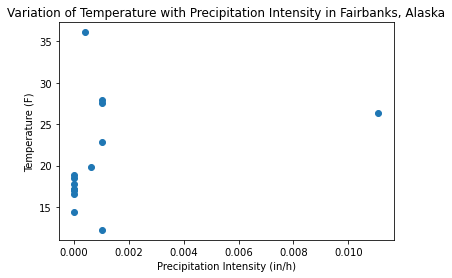

In [26]:
x = df['precip_int']
y = df['temperature']
plt.scatter(x,y)
plt.xlabel('Precipitation Intensity (in/h)')
plt.ylabel('Temperature (F)')
plt.title('Variation of Temperature with Precipitation Intensity in Fairbanks, Alaska')

There is almost no precipitation. The temperature varies by about 25F.

Text(0.5, 1.0, 'Variation of Temperature with Cloud Coverage in Fairbanks, Alaska')

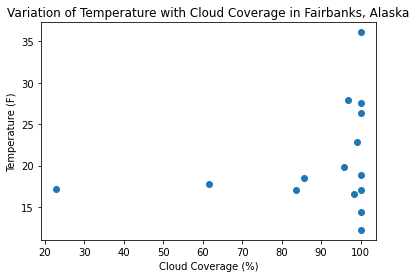

In [27]:
x = df['perc_clouds']
y = df['temperature']
plt.scatter(x,y)
plt.xlabel('Cloud Coverage (%)')
plt.ylabel('Temperature (F)')
plt.title('Variation of Temperature with Cloud Coverage in Fairbanks, Alaska')

On most days, the cloud coverage is over 80% and usually about 100%. The temperature varies by about 25F.

Text(0.5, 1.0, 'Variation of Precipitation with Increasing Cloud Coverage in Fairbanks, Alaska')

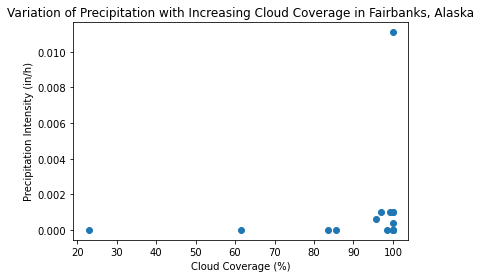

In [28]:
x = df['perc_clouds']
y = df['precip_int']
plt.scatter(x,y)
plt.xlabel('Cloud Coverage (%)')
plt.ylabel('Precipitation Intensity (in/h)')
plt.title('Variation of Precipitation with Increasing Cloud Coverage in Fairbanks, Alaska')

There is very little precipitation, even with 100% cloud coverage. There is one outlier precipitation intensity of 0.0111 in/h. However, all of the values show very little precipitation.

In conclusion, Fairbanks, Alaska has cloudy, mostly dry (minimal snow) days ahead. Because this dataset only includes 15 days of predictions, it's not enough to forecast the weather much further out. However, it's a good dataset for exploratory observations of current weather conditions in Fairbanks.